https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
%matplotlib inline

df_temp = pd.read_csv('life-expectancy-who.zip')

In [3]:
df_temp.head(25)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
print(list(df_temp.columns))

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [5]:
df = df_temp.rename(columns=lambda x: x.strip())

In [6]:
print(list(df.columns))

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [7]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

2 Categorical variables: Country & Status
20 Numeric variables

### Country: 
    Country
### Year: 
    Year
### Status: 
    Developed or Developing status
### Life expectancy: 
    Life Expectancy in age
### Adult Mortality: 
    Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
### Infant deaths: 
    Number of Infant Deaths per 1000 population
### Alcohol: 
    Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
### percentage expenditure: 
    Expenditure on health as a percentage of Gross Domestic Product per capita(%)
### Hepatitis BHepatitis B (HepB):  
    immunization coverage among 1-year-olds (%)
### Measles: 
    Measles - number of reported cases per 1000 population
### BMI: 
    Average Body Mass Index of entire population
### under-five deaths: 
    Number of under-five deaths per 1000 population
### Polio: 
    Polio (Pol3) immunization coverage among 1-year-olds (%)
### Total expenditure: 
    General government expenditure on health as a percentage of total government expenditure (%)
### Diphtheria: 
    Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
### HIV/AIDS: 
    Deaths per 1 000 live births HIV/AIDS (0-4 years)
### GDP: 
    Gross Domestic Product per capita (in USD)
### Population: 
    Population of the country
### thinness 1-19 years: 
    Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
### thinness 5-9 years: 
    Prevalence of thinness among children for Age 5 to 9(%)
### Income composition of resources: 
    Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
### Schooling: 
    Number of years of Schooling(years)

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

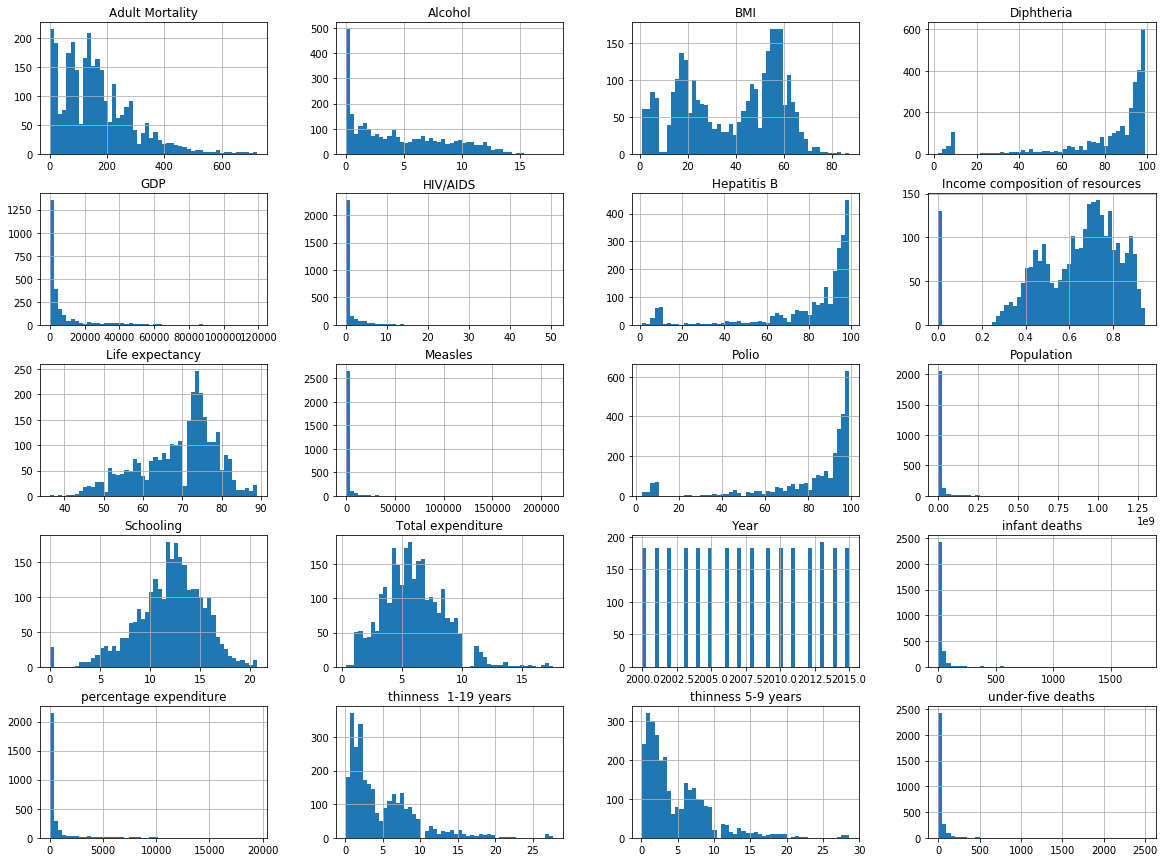

In [10]:
# Visualizing the data

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1,0.170033,-0.0790516,-0.0374149,-0.0529898,0.0314,0.104333,-0.082493,0.108974,-0.042937,0.0941584,0.0907401,0.134337,-0.139741,0.10162,0.0169692,-0.0478764,-0.0509291,0.243468,0.2094
Life expectancy,0.170033,1,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.0215381,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.0790516,-0.696359,1,0.078756,-0.195848,-0.24286,-0.162476,0.0311764,-0.387017,0.0941461,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.0374149,-0.196557,0.078756,1,-0.115638,-0.0856122,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.0252313,-0.108427,0.556801,0.465711,0.47135,-0.145139,-0.19372
Alcohol,-0.0529898,0.404877,-0.195848,-0.115638,1,0.341285,0.0875487,-0.0518267,0.330408,-0.11237,0.221734,0.296942,0.22202,-0.0488446,0.354712,-0.0352523,-0.428795,-0.417414,0.45004,0.547378
percentage expenditure,0.0314,0.381864,-0.24286,-0.0856122,0.341285,1,0.0162737,-0.0565957,0.2287,-0.0878523,0.147259,0.17442,0.143624,-0.0978568,0.899373,-0.0256619,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.0875487,0.0162737,1,-0.120529,0.15038,-0.233126,0.486171,0.0582803,0.611495,-0.112675,0.0839032,-0.123321,-0.120429,-0.12496,0.199549,0.231117
Measles,-0.082493,-0.157586,0.0311764,0.501128,-0.0518267,-0.0565957,-0.120529,1,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.0308987,-0.0764661,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.2287,0.15038,-0.175977,1,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.0941461,0.996629,-0.11237,-0.0878523,-0.233126,0.507809,-0.237669,1,-0.18872,-0.130148,-0.195668,0.0380615,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


Variables that have > 0.6 correlation with life expectancy: 

* Adult Mortality
* Income composition of resources
* Schooling

Variables that seem to be highly correlated with each other: 
* under-five deaths & infant deaths - these attributes could be merged into an engineered attribute `pct_infantDeaths`
* GDP & percentage expenditure
* thinness 1-19 year & thinness 5-9 years - these attributes could be merged into an engineered attribute `pct_thinness`
* Income composition of resources & Schooling

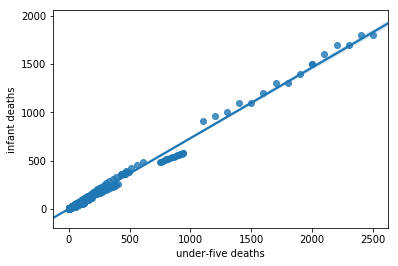

In [12]:
#visually verifying correlation of under-five deaths & infant deaths
sns.regplot(df["under-five deaths"],df["infant deaths"])

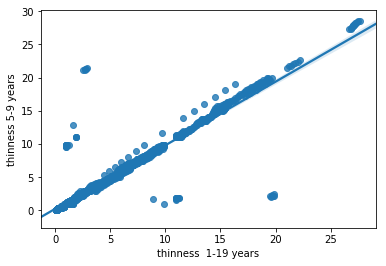

In [13]:
#visually verifying correlation of under-five deaths & infant deaths
sns.regplot(df["thinness  1-19 years"],df["thinness 5-9 years"])

### Additional checking of *nulls* and bad data

In [14]:
#absolute number check
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
#percentage check
df.isnull().sum() * 100/df['Country'].count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

The ratio of *null* values for `Hepatitis B`, `GDP` and `Population` are very high and blindly imputing these values could cause a problem. 
* `Hepatitis B` can be filled from another data source (https://data.worldbank.org/indicator/SH.IMM.HEPB)
* `GDP` (per capita) can be filled from another data source (https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)
* `Population` can be filled from another data source (https://data.worldbank.org/indicator/sp.pop.totl)

There are records with missing `Life expectancy` data which should be investigated, since this data is critical to the project. Further in the analysis, it is noticed these countries only have one year of data, so they can be dropped without affecting the project analysis.

In [16]:
df[df["Life expectancy"].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


The `Adult Mortality` *nulls* are the same countries with missing `Life expectancy` data. These countries would be dropped.

In [17]:
df[df["Adult Mortality"].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


There are a lot of *null* values for `Alcohol`. The missing values will be imputed as the average alcohol consumption of that country. The remaining countries with absolutely no `Alcohol` data will be filled with the average consumption of the entire dataset.

In [18]:
df[df["Alcohol"].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,93.0,309,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.0,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.0,98.0,0,...,98.0,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5


Not too many *null* values for `BMI`. Manually searching (http://gamapserver.who.int/gho/interactive_charts/ncd/risk_factors/bmi/tablet/atlas.html), it is found that the BMI for these two countries have a BMI of 24.7 . This value can be used to fill the nulls.

It is also noticed there are over 200 entries where the BMI is less than 10, which is almost impossible to achieve. These values will be replaced with the average BMI for the respective country.

In [19]:
df[df["BMI"].isnull()][["Country","Year","BMI"]]

,Country,Year,BMI
1715,Monaco,2013,NaN
2216,San Marino,2013,NaN
2409,South Sudan,2015,NaN
2410,South Sudan,2014,NaN
2411,South Sudan,2013,NaN
2412,South Sudan,2012,NaN
2413,South Sudan,2011,NaN
2414,South Sudan,2010,NaN
2415,South Sudan,2009,NaN
2416,South Sudan,2008,NaN


In [20]:
df[df["BMI"] < 10]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
25,Albania,2006,Developing,74.2,99.0,1,5.31,3.302154,98.0,68,...,97.0,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4
40,Algeria,2007,Developing,73.8,129.0,20,0.44,320.323924,9.0,0,...,95.0,3.82,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
53,Angola,2010,Developing,49.6,365.0,78,7.80,191.653741,77.0,1190,...,81.0,3.39,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0
75,Antigua and Barbuda,2004,Developing,74.4,149.0,0,7.28,22.862952,97.0,0,...,97.0,4.21,97.0,0.1,1352.837400,NaN,3.5,3.4,0.000,0.0
76,Antigua and Barbuda,2003,Developing,74.2,151.0,0,7.16,1158.065259,99.0,0,...,99.0,4.53,99.0,0.1,9739.825560,NaN,3.5,3.5,0.000,0.0
84,Argentina,2011,Developing,75.7,12.0,9,8.11,1504.329462,91.0,3,...,93.0,5.89,91.0,0.1,12726.983600,41656879.0,1.0,0.9,0.816,17.1
102,Armenia,2009,Developing,73.3,137.0,1,3.96,201.185546,93.0,0,...,94.0,4.55,93.0,0.1,2993.832531,2888584.0,2.0,2.1,0.725,11.9
103,Armenia,2008,Developing,73.2,14.0,1,3.96,2.888898,89.0,0,...,91.0,3.80,89.0,0.1,41.269970,29822.0,2.0,2.1,0.721,12.3
123,Australia,2004,Developed,86.0,69.0,1,9.84,588.568371,95.0,70,...,92.0,8.57,92.0,0.1,3472.379770,21274.0,0.7,0.6,0.908,20.7
124,Australia,2003,Developed,83.0,71.0,1,9.97,3829.550928,95.0,91,...,92.0,8.32,93.0,0.1,23465.385590,198954.0,0.7,0.7,0.905,20.6


Not too many *null* values for `Polio` and `Diphtheria`. To solve this, the *nulls* of these two features will be filled with the mean.

In [21]:
df[df["Polio"].isnull()][["Country","Year","Polio","Diphtheria"]]

,Country,Year,Polio,Diphtheria
1742,Montenegro,2005,NaN,NaN
1743,Montenegro,2004,NaN,NaN
1744,Montenegro,2003,NaN,NaN
1745,Montenegro,2002,NaN,NaN
1746,Montenegro,2001,NaN,NaN
1747,Montenegro,2000,NaN,NaN
2414,South Sudan,2010,NaN,NaN
2415,South Sudan,2009,NaN,NaN
2416,South Sudan,2008,NaN,NaN
2417,South Sudan,2007,NaN,NaN


Not too many *null* values for `thinness  1-19 years` and `thinness  1-19 years`. To solve this, the *nulls* of these two features will be filled with the mean of the dataset.

In [22]:
df[df["thinness  1-19 years"].isnull()][["Country","Year","thinness  1-19 years","thinness  1-19 years"]]

,Country,Year,thinness 1-19 years,thinness 1-19 years
1715,Monaco,2013,NaN,NaN
2216,San Marino,2013,NaN,NaN
2409,South Sudan,2015,NaN,NaN
2410,South Sudan,2014,NaN,NaN
2411,South Sudan,2013,NaN,NaN
2412,South Sudan,2012,NaN,NaN
2413,South Sudan,2011,NaN,NaN
2414,South Sudan,2010,NaN,NaN
2415,South Sudan,2009,NaN,NaN
2416,South Sudan,2008,NaN,NaN


In [23]:
#df[df["Income composition of resources"].isnull()][["Country","Year","Income composition of resources","Schooling"]]
df[df["Income composition of resources"].isnull()][["Country","Year","Income composition of resources","Schooling"]].groupby("Country").count()

,Year,Income composition of resources,Schooling
Country,,,
Cook Islands,1,0,0
Czechia,16,0,0
Côte d'Ivoire,16,0,0
Democratic People's Republic of Korea,16,0,0
Democratic Republic of the Congo,16,0,0
Marshall Islands,1,0,1
Monaco,1,0,0
Nauru,1,0,1
Niue,1,0,0


## Cleaning & Engineering Data

### Years of data by *Country*

First checking how many years of data by country, we can see roughly 16 years of data per country

In [24]:
df['Country'].nunique()

193

https://www.kaggle.com/statchaitya/country-to-continent

In [25]:
cont_temp = pd.read_csv('country-to-continent.zip', encoding='latin-1') #ecncoding due to unicode error
cont =cont_temp.rename(columns={"country": "Country"})
print(list(cont.columns))

['Country', 'code_2', 'code_3', 'country_code', 'iso_3166_2', 'continent', 'sub_region', 'region_code', 'sub_region_code']


In [26]:
df3 = pd.merge(df, cont, on=['Country'])
df3.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Income composition of resources,Schooling,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.479,10.1,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.476,10.0,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.470,9.9,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.463,9.8,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.454,9.5,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0


In [27]:
df3['continent'].isnull().sum()

0

In [28]:
df3.groupby(['continent']).mean()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,country_code,region_code,sub_region_code
continent,,,,,,,,,,,,,,,,,,,,,
Africa,2007.500000,58.718269,265.866587,39.606971,2.657882,112.859035,75.490939,3254.579327,23.436125,61.429087,...,5.459135,1555.277017,8.542945e+06,7.237125,7.168000,0.462598,9.211625,456.730769,2.0,14.038462
Americas,2007.520755,73.485417,130.846591,7.747170,5.974628,478.774279,83.080169,20.181132,46.019057,9.250943,...,0.393396,5318.467082,1.105623e+07,2.577358,2.519057,0.669193,12.795331,367.801887,19.0,15.958491
Asia,2007.500000,71.032639,134.101389,63.312500,1.957962,483.274984,83.745814,4364.500000,34.233056,81.466667,...,0.157222,7375.560046,2.742576e+07,7.486389,7.752917,0.643231,11.752083,431.355556,142.0,88.022222
Europe,2007.519031,77.748437,96.654514,1.242215,9.617647,2283.329031,84.264781,521.204152,52.934896,1.489619,...,0.116609,17578.788230,8.490715e+06,1.507986,1.506944,0.812948,15.283066,428.480969,150.0,118.314879
Oceania,2007.698795,71.214375,135.087500,1.120482,2.888846,925.367783,73.157576,253.415663,55.751807,1.457831,...,0.203012,6718.785015,1.316539e+06,0.964458,0.914458,0.616348,12.807927,463.379518,9.0,55.915663


Text(0.5,1,'Life Expectancy by Continent')

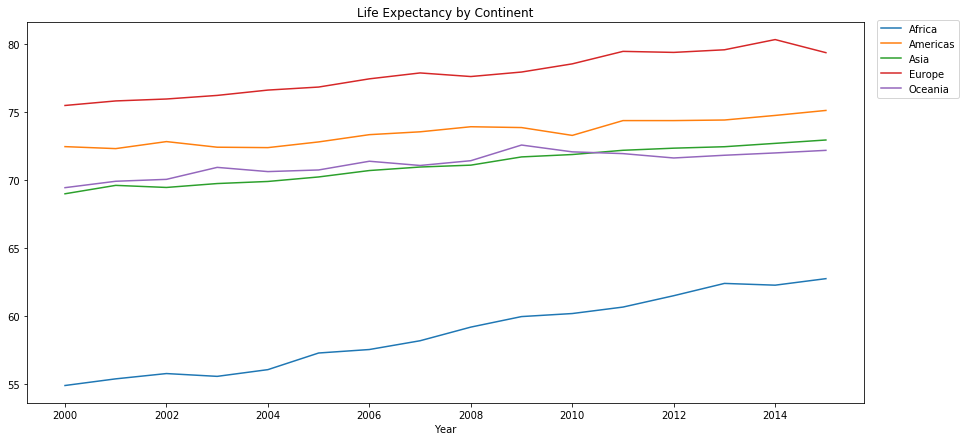

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['Year','continent']).mean()['Life expectancy'].unstack().plot(ax=ax)
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1.02))
plt.title('Life Expectancy by Continent')

Text(0.5,1,'Life Expectancy by Sub Region')

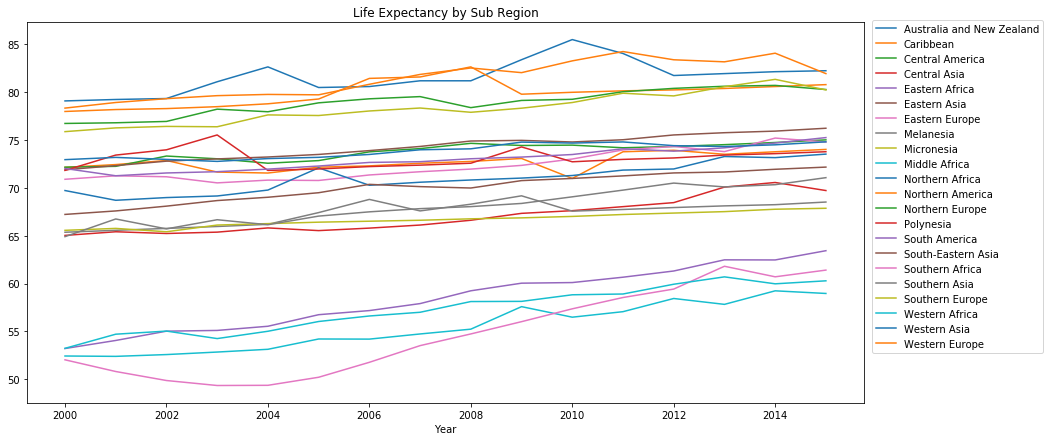

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['Year','sub_region']).mean()['Life expectancy'].unstack().plot(ax=ax)
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.02))
plt.title('Life Expectancy by Sub Region')

In [66]:
df = df3

In [67]:
df2 = df.groupby('Country')['Year'].nunique()
df2

Country
Afghanistan                                             16
Albania                                                 16
Algeria                                                 16
Angola                                                  16
Antigua and Barbuda                                     16
Argentina                                               16
Armenia                                                 16
Australia                                               16
Austria                                                 16
Azerbaijan                                              16
Bahamas                                                 16
Bahrain                                                 16
Bangladesh                                              16
Barbados                                                16
Belarus                                                 16
Belgium                                                 16
Belize                                          

Further inspection shows that there are some countries where there is only one year of data. It's noticed that these countries are the same countries which have *null* `Life expectancy` data, and will be dropped from the analysis since there is minimal information to work with and they are missing *life expectancy* data.

In [68]:
#which countries don't have 16 years of records
df2[(df2 != 16)]

Country
Cook Islands             1
Dominica                 1
Marshall Islands         1
Monaco                   1
Nauru                    1
Niue                     1
Palau                    1
Saint Kitts and Nevis    1
San Marino               1
Tuvalu                   1
Name: Year, dtype: int64

In [69]:
#looking at the records of these countries which don't have 16 years of records
df[df['Country'].isin(df2[(df2 != 16)].index.tolist())]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Income composition of resources,Schooling,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,NaN,NaN,CK,COK,184,ISO 3166-2:CK,Oceania,Polynesia,9.0,61.0
721,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,0.721,12.7,DM,DMA,212,ISO 3166-2:DM,Americas,Caribbean,19.0,29.0
1602,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,NaN,0.0,MH,MHL,584,ISO 3166-2:MH,Oceania,Micronesia,9.0,57.0
1667,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,NaN,NaN,MC,MCO,492,ISO 3166-2:MC,Europe,Western Europe,150.0,155.0
1764,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,NaN,9.6,NR,NRU,520,ISO 3166-2:NR,Oceania,Micronesia,9.0,57.0
1861,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,NaN,NaN,NU,NIU,570,ISO 3166-2:NU,Oceania,Polynesia,9.0,61.0
1910,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,0.779,14.2,PW,PLW,585,ISO 3166-2:PW,Oceania,Micronesia,9.0,57.0
2087,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,0.749,13.4,KN,KNA,659,ISO 3166-2:KN,Americas,Caribbean,19.0,29.0
2136,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,NaN,15.1,SM,SMR,674,ISO 3166-2:SM,Europe,Southern Europe,150.0,39.0
2617,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,NaN,0.0,TV,TUV,798,ISO 3166-2:TV,Oceania,Polynesia,9.0,61.0


In [70]:
#removing those countries
df = df[~df['Country'].isin(df2[(df2 != 16)].index.tolist())]

### Filling  `Hepatitis B` from another data source

In [71]:
#Read secondary source of data
df_hep = pd.read_csv('API_SH.IMM.HEPB_DS2_en_csv_v2_515680.csv',header=2,index_col=0).rename(
    index={'Bahamas, The': 'Bahamas',
           'Bolivia':'Bolivia (Plurinational State of)',
           "Cote d'Ivoire":"Côte d'Ivoire",
           'Congo, Rep.':'Congo',
           'Congo, Dem. Rep.':'Democratic Republic of the Congo',
           'Czech Republic':'Czechia',
           'Korea, Dem. People’s Rep.':"Democratic People's Republic of Korea",
           'Egypt, Arab Rep.':'Egypt',
           'Gambia, The':'Gambia',
           'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
           'Kyrgyz Republic':'Kyrgyzstan',
           'Lao PDR':"Lao People's Democratic Republic",
           'Micronesia, Fed. Sts.':'Micronesia (Federated States of)',
           'Korea, Rep.':'Republic of Korea',
           'Moldova':'Republic of Moldova',
           'St. Lucia':'Saint Lucia',
           'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
           'Slovak Republic':'Slovakia',
           'North Macedonia':'The former Yugoslav republic of Macedonia',
           'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
           'Tanzania':'United Republic of Tanzania',
           'United States':'United States of America',
           'Venezuela, RB':'Venezuela (Bolivarian Republic of)',
           'Vietnam':'Viet Nam',
           'Yemen, Rep.':'Yemen'
          })
#the following countries are missing data. Filling NaN with mean
fillNaNCountryList = ['Algeria','Angola','Antigua and Barbuda','Argentina','Australia','Azerbaijan','Bahamas','Bangladesh','Barbados','Benin','Bosnia and Herzegovina','Burkina Faso','Burundi',
                      "Côte d'Ivoire",'Cabo Verde','Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','Comoros','Congo','Croatia','Czechia',
                      "Democratic People's Republic of Korea",'Democratic Republic of the Congo','Djibouti','Equatorial Guinea','Eritrea','Estonia','Ethiopia',
                      'Gabon','Ghana','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana','Haiti','India','Ireland','Jamaica','Kenya',"Lao People's Democratic Republic",'Lesotho','Liberia',
                      'Madagascar','Malawi','Mali','Malta','Mauritania','Montenegro','Mozambique','Myanmar','Namibia','Nepal','Netherlands','Niger','Nigeria','Pakistan','Panama','Paraguay','Peru',
                      'Russian Federation','Rwanda','Saint Lucia','Saint Vincent and the Grenadines','Sao Tome and Principe','Senegal','Serbia','Sierra Leone','Somalia','South Sudan','Sri Lanka','Sudan','Suriname','Sweden','Switzerland',
                      'Tajikistan','The former Yugoslav republic of Macedonia','Timor-Leste','Togo','Trinidad and Tobago','Turkmenistan','Uganda','United Republic of Tanzania','Uzbekistan','Viet Nam','Zambia']
for country in fillNaNCountryList:
    df_hep.loc[country] = df_hep.loc[country].fillna(value=df_hep.drop(columns=['Country Code','Indicator Name','Indicator Code']).loc[country].mean())

#the following countries are completely missing data. However they are all well-developed european countries (except japan). Will use average of data from a similar country 'Netherlands'
fillNaNCountryList = ['Denmark','Finland','Hungary','Iceland','Japan','Norway','Slovenia','United Kingdom of Great Britain and Northern Ireland']
for country in fillNaNCountryList:
    df_hep.loc[country] = df_hep.loc[country].fillna(value=df_hep.drop(columns=['Country Code','Indicator Name','Indicator Code']).loc['Netherlands'].mean())

# create dict of indexes with null population and corresponding country,year
nullIdx = df[df["Hepatitis B"].isnull()][["Country","Year"]].T.to_dict()

# set values for nulls
for i,countryYear in nullIdx.items():
    df.loc[i,"Hepatitis B"] = df_hep.loc[countryYear["Country"]][str(countryYear["Year"])]

#debugging code
#for i,countryYear in nullIdx.items():
#    if np.isnan(df_hep.loc[countryYear["Country"]][str(countryYear["Year"])]):
#        print(countryYear)
#    df.loc[i,"GDP"] = df_gdp[df_gdp["Country Name"] == countryYear["Country"]][str(countryYear["Year"])].values[0]
#        print(df_gdp[df_gdp["Country Name"] == countryYear["Country"]][str(countryYear["Year"])].values[0])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Filling `Population` from another data source

In [72]:
#Read secondary source of data
df_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_422125.csv',header=2,index_col=0).rename(
    index={'Bahamas, The': 'Bahamas',
           'Bolivia':'Bolivia (Plurinational State of)',
           "Cote d'Ivoire":"Côte d'Ivoire",
           'Congo, Rep.':'Congo',
           'Congo, Dem. Rep.':'Democratic Republic of the Congo',
           'Czech Republic':'Czechia',
           'Korea, Dem. People’s Rep.':"Democratic People's Republic of Korea",
           'Egypt, Arab Rep.':'Egypt',
           'Gambia, The':'Gambia',
           'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
           'Kyrgyz Republic':'Kyrgyzstan',
           'Lao PDR':"Lao People's Democratic Republic",
           'Micronesia, Fed. Sts.':'Micronesia (Federated States of)',
           'Korea, Rep.':'Republic of Korea',
           'Moldova':'Republic of Moldova',
           'St. Lucia':'Saint Lucia',
           'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
           'Slovak Republic':'Slovakia',
           'North Macedonia':'The former Yugoslav republic of Macedonia',
           'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
           'Tanzania':'United Republic of Tanzania',
           'United States':'United States of America',
           'Venezuela, RB':'Venezuela (Bolivarian Republic of)',
           'Vietnam':'Viet Nam',
           'Yemen, Rep.':'Yemen'
          })
#Eritrea - missing data. Filling NaN with mean
df_pop.loc['Eritrea'] = df_pop.loc['Eritrea'].fillna(value=df_pop.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 64']).loc['Eritrea'].mean())

# create dict of indexes with null population and corresponding country,year
nullIdx = df[df["Population"].isnull()][["Country","Year"]].T.to_dict()

#set values for population nulls
for i,countryYear in nullIdx.items():
    df.loc[i,"Population"] = df_pop.loc[countryYear["Country"]][str(countryYear["Year"])]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Filling `GDP` (per capita) from another data source

In [73]:
#Read secondary source of data
df_gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_511373.csv',header=2,index_col=0).rename(
    index={'Bahamas, The': 'Bahamas',
           'Bolivia':'Bolivia (Plurinational State of)',
           "Cote d'Ivoire":"Côte d'Ivoire",
           'Congo, Rep.':'Congo',
           'Congo, Dem. Rep.':'Democratic Republic of the Congo',
           'Czech Republic':'Czechia',
           'Korea, Dem. People’s Rep.':"Democratic People's Republic of Korea",
           'Egypt, Arab Rep.':'Egypt',
           'Gambia, The':'Gambia',
           'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
           'Kyrgyz Republic':'Kyrgyzstan',
           'Lao PDR':"Lao People's Democratic Republic",
           'Micronesia, Fed. Sts.':'Micronesia (Federated States of)',
           'Korea, Rep.':'Republic of Korea',
           'Moldova':'Republic of Moldova',
           'St. Lucia':'Saint Lucia',
           'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
           'Slovak Republic':'Slovakia',
           'North Macedonia':'The former Yugoslav republic of Macedonia',
           'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
           'Tanzania':'United Republic of Tanzania',
           'United States':'United States of America',
           'Venezuela, RB':'Venezuela (Bolivarian Republic of)',
           'Vietnam':'Viet Nam',
           'Yemen, Rep.':'Yemen'
          })
#the following countries are missing data. Filling NaN with mean
fillNaNCountryList = ['Eritrea', 'Iraq', 'Sao Tome and Principe', 'Somalia', 'South Sudan', 'Syrian Arab Republic', 'Venezuela (Bolivarian Republic of)']
for country in fillNaNCountryList:
    df_gdp.loc[country] = df_gdp.loc[country].fillna(value=df_gdp.drop(columns=['Country Code','Indicator Name','Indicator Code']).loc[country].mean())
#special case, filling North Korea with GDP/cap from https://www.cia.gov/library/publications/the-world-factbook/geos/kn.html
df_gdp.loc["Democratic People's Republic of Korea"] = df_gdp.loc["Democratic People's Republic of Korea"].fillna(value=1700)

# create dict of indexes with null population and corresponding country,year
nullIdx = df[df["GDP"].isnull()][["Country","Year"]].T.to_dict()

#set values for nulls
for i,countryYear in nullIdx.items():
    df.loc[i,"GDP"] = df_gdp.loc[countryYear["Country"]][str(countryYear["Year"])]

#debugging code
#for i,countryYear in nullIdx.items():
#    if np.isnan(df_gdp[df_gdp["Country Name"] == countryYear["Country"]][str(countryYear["Year"])].values[0]):
#        print(countryYear)
#    df.loc[i,"GDP"] = df_gdp[df_gdp["Country Name"] == countryYear["Country"]][str(countryYear["Year"])].values[0]
#        print(df_gdp[df_gdp["Country Name"] == countryYear["Country"]][str(countryYear["Year"])].values[0])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Filling *nulls* in `Alcohol`

In [74]:
# impute alcohol means by country
impute_alcohol = df.groupby('Country').mean()["Alcohol"].to_dict()

# create dict of indexes with null alcohol and corresponding country
nullIdx = df[df["Alcohol"].isnull()]["Country"].to_dict()

# set values for alcohol nulls
for i,country in nullIdx.items():
    df.loc[i,"Alcohol"] = impute_alcohol[country]
    
# checking for other nulls
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [75]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  204
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources     64
Schooling                           64
code_2                              16
code_3                               0
country_code                         0
iso_3166_2               

### Filling *nulls* in `BMI` and correcting *BMI < 10*

In [76]:
df["BMI"].fillna(value=24.7,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [77]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                               19
Total expenditure                  204
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources     64
Schooling                           64
code_2                              16
code_3                               0
country_code                         0
iso_3166_2               

In [78]:
# filling bad values with NaN to reduce skewing the mean calculation
for i in df[df["BMI"] < 10].index:
    df.loc[i,"BMI"] = float('NaN')

# create dict of indexes with bad values
nullIdx = df[df["BMI"].isnull()]["Country"].to_dict()

# impute BMI means by country
impute_BMI = df.groupby('Country').mean()["BMI"].to_dict()

# fill with imputed data
for i,country in nullIdx.items():
    df.loc[i,"BMI"] = impute_BMI[country]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Filling *nulls* in `Polio` and `Diphtheria`

In [79]:
# impute means by country
impute_polio = df.groupby('Country').mean()["Polio"].to_dict()
impute_dipht = df.groupby('Country').mean()["Diphtheria"].to_dict()

# create dict of indexes with nulls
nullIdx = df[df["Polio"].isnull()]["Country"].to_dict()

# set values for nulls
for i,country in nullIdx.items():
    df.loc[i,"Polio"] = impute_polio[country]
    df.loc[i,"Diphtheria"] = impute_dipht[country]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Filling *nulls* in `thinness  1-19 years` and `thinness 5-9 years`

In [80]:
df["thinness  1-19 years"].fillna(value=df.mean()["thinness  1-19 years"],inplace=True)
df["thinness 5-9 years"].fillna(value=df.mean()["thinness 5-9 years"],inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [81]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                  204
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources     64
Schooling                           64
code_2                              16
code_3                               0
country_code                         0
iso_3166_2               

## Merging `under-five deaths` and `infant deaths` into `pct_infantDeaths`

In [82]:
df['pct_infantDeaths'] = df[["under-five deaths","infant deaths"]].mean(axis=1)*100/1000
df.drop(columns=["under-five deaths","infant deaths"],inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Merging `thinness  1-19 years` and `thinness 5-9 years` into `pct_thinness`

In [83]:
df['pct_thinness'] = df[["thinness  1-19 years","thinness 5-9 years"]].mean(axis=1)
df.drop(columns=["thinness  1-19 years","thinness 5-9 years"],inplace=True)
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code,pct_infantDeaths,pct_thinness
0,Afghanistan,2015,Developing,65.0,263.0,0.010,71.279624,65.000000,1154,19.100000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,7.25,17.25
1,Afghanistan,2014,Developing,59.9,271.0,0.010,73.523582,62.000000,492,18.600000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,7.50,17.50
2,Afghanistan,2013,Developing,59.9,268.0,0.010,73.219243,64.000000,430,18.100000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,7.75,17.70
3,Afghanistan,2012,Developing,59.5,272.0,0.010,78.184215,67.000000,2787,17.600000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,8.10,17.95
4,Afghanistan,2011,Developing,59.2,275.0,0.010,7.097109,68.000000,3013,17.200000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,8.40,18.20
5,Afghanistan,2010,Developing,58.8,279.0,0.010,79.679367,66.000000,1989,16.700000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,8.80,18.40
6,Afghanistan,2009,Developing,58.6,281.0,0.010,56.762217,63.000000,2861,16.200000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,9.15,18.65
7,Afghanistan,2008,Developing,58.1,287.0,0.030,25.873925,64.000000,1599,15.700000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,9.50,18.85
8,Afghanistan,2007,Developing,57.5,295.0,0.020,10.910156,63.000000,1141,15.200000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,9.75,19.05
9,Afghanistan,2006,Developing,57.3,295.0,0.030,17.171518,64.000000,1990,14.700000,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,10.00,19.25


In [84]:
df.groupby(['Country', 'Year']).mean()

Life expectancy  Adult Mortality   Alcohol  \
Country     Year                                               
Afghanistan 2000             54.8            321.0  0.010000   
            2001             55.3            316.0  0.010000   
            2002             56.2              3.0  0.010000   
            2003             56.7            295.0  0.010000   
            2004             57.0            293.0  0.020000   
            2005             57.3            291.0  0.020000   
            2006             57.3            295.0  0.030000   
            2007             57.5            295.0  0.020000   
            2008             58.1            287.0  0.030000   
            2009             58.6            281.0  0.010000   
            2010             58.8            279.0  0.010000   
            2011             59.2            275.0  0.010000   
            2012             59.5            272.0  0.010000   
            2013             59.9            268.0  0.010000   
            2014             59.9            271.0  0.010000   
            2015             65.0            263.0  0.010000   
Albania     2000             72.6             11.0  3.660000   
            2001             73.6             14.0  4.250000   
            2002             73.3             15.0  3.730000   
            2003             72.8             18.0  4.290000   
            2004             73.0             17.0  4.540000   
            2005             73.5             15.0  5.160000   
            2006             74.2             99.0  5.310000   
            2007             75.9              9.0  5.580000   
            2008             75.3              1.0  5.610000   
            2009             76.1             91.0  5.790000   
            2010             76.2             91.0  5.280000   
            2011             76.6             88.0  5.370000   
            2012             76.9             86.0  5.140000   
            2013             77.2             84.0  4.760000   
...                           ...              ...       ...   
Zambia      2002             45.5             69.0  2.440000   
            2003             46.4             64.0  2.330000   
            2004             47.9            578.0  2.460000   
            2005             49.3            554.0  2.330000   
            2006             58.0            526.0  2.250000   
            2007             52.6            487.0  2.080000   
            2008             55.7             45.0  2.120000   
            2009             57.4            368.0  2.300000   
            2010             58.0            363.0  2.470000   
            2011             58.2            366.0  2.570000   
            2012             59.2            349.0  2.590000   
            2013             63.0            328.0  2.410000   
            2014             61.1            314.0  0.010000   
            2015             61.8             33.0  2.239333   
Zimbabwe    2000             46.0            665.0  1.680000   
            2001             45.3            686.0  1.720000   
            2002             44.8             73.0  4.430000   
            2003             44.5            715.0  4.060000   
            2004             44.3            723.0  4.360000   
            2005             44.6            717.0  4.140000   
            2006             45.4              7.0  4.570000   
            2007             46.6             67.0  3.880000   
            2008             48.2            632.0  3.560000   
            2009             50.0            587.0  4.640000   
            2010             52.4            527.0  5.210000   
            2011             54.9            464.0  6.000000   
            2012             56.6            429.0  6.090000   
            2013             58.0            399.0  6.390000   
            2014             59.2            371.0  6.500000   
            2015             67.0            336.0

In [85]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [86]:
status_developed = df.loc[df['Status'] == 'Developed']

In [87]:
status_developing = df.loc[df['Status'] == 'Developing']

Text(0.5,1,'Life Expectancy for Developed Countries')

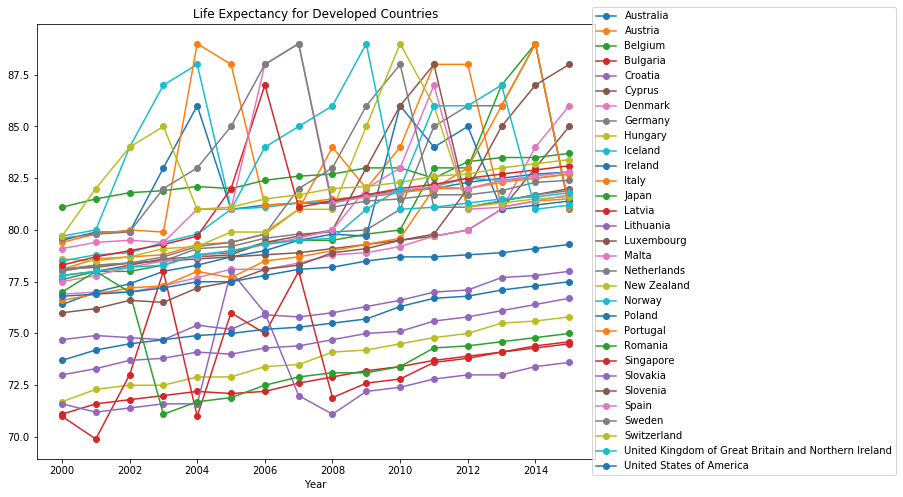

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
countries = list(status_developed['Country'].unique())
for c in countries:
    df2 = status_developed.loc[status_developed['Country'] == c]
    df2.plot('Year', 'Life expectancy', marker='o', ax=ax, label=c)
plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1.05))
plt.title('Life Expectancy for Developed Countries')

Text(0.5,1,'Life Expectancy for Developing Countries')

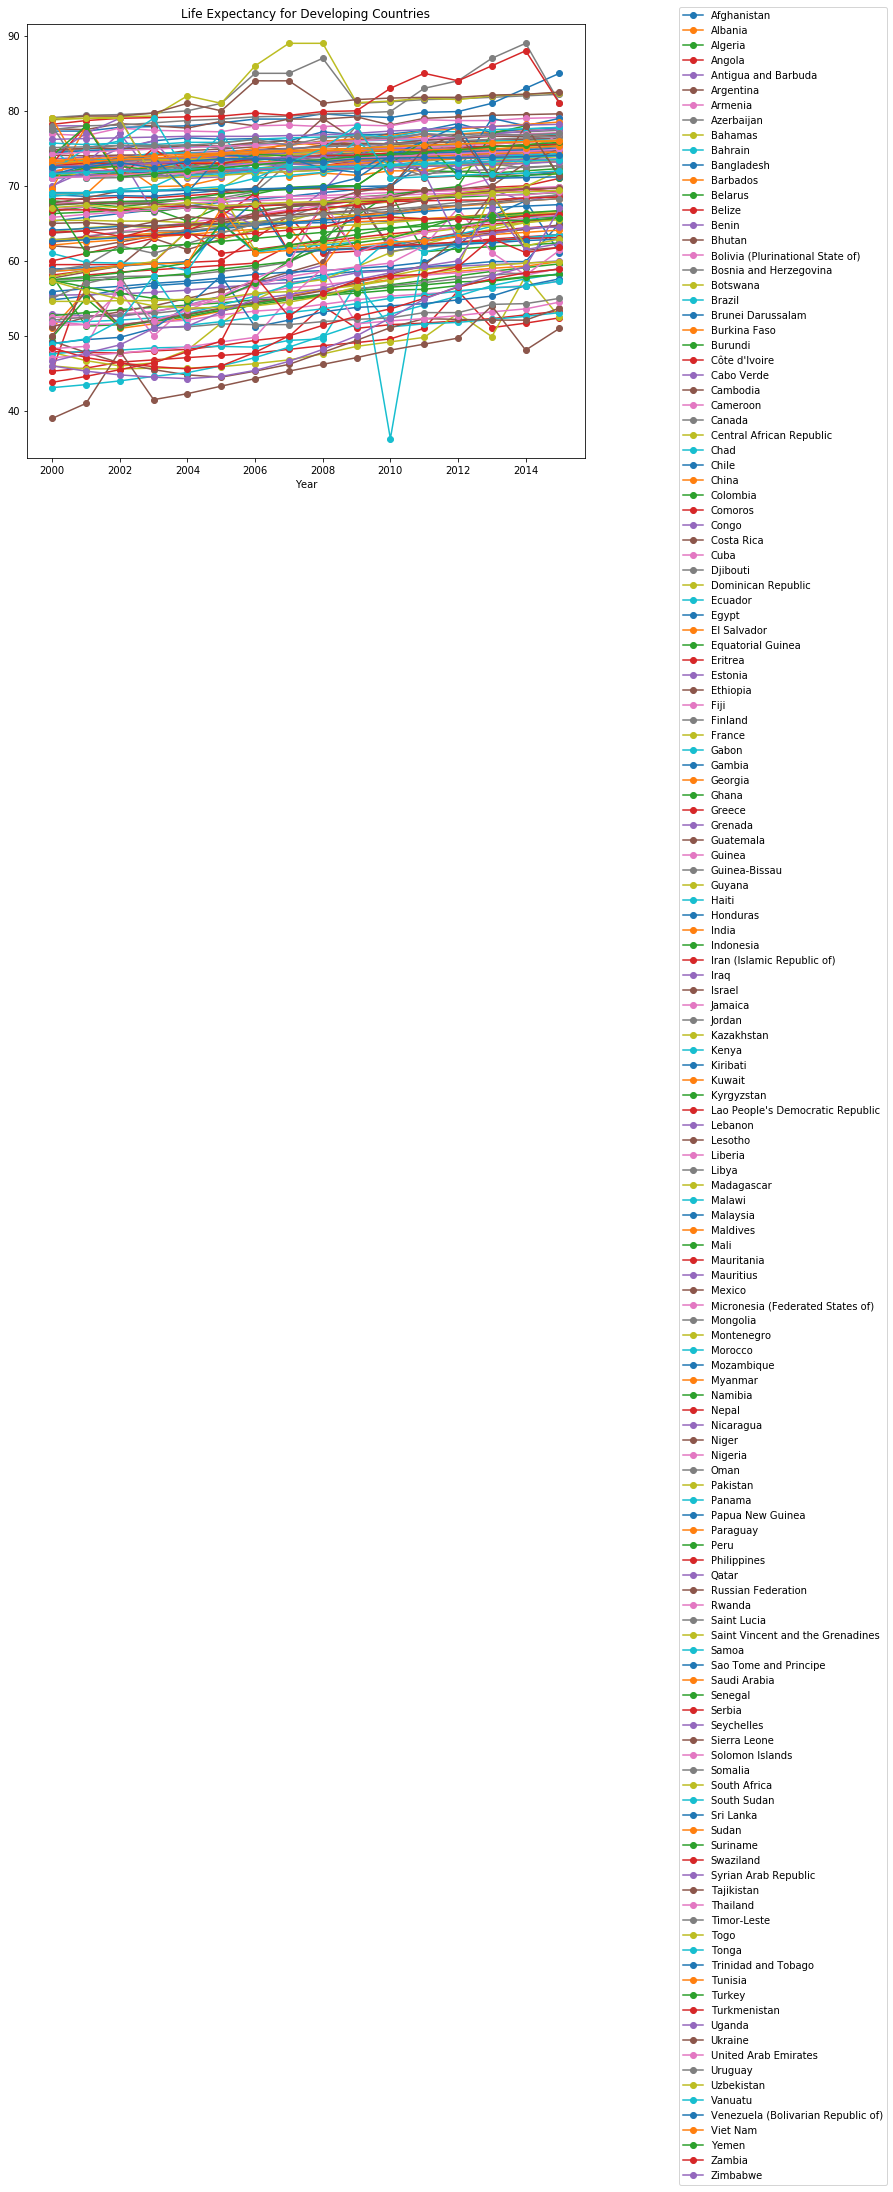

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
countries = list(status_developing['Country'].unique())
for c in countries:
    df2 = status_developing.loc[status_developing['Country'] == c]
    df2.plot('Year', 'Life expectancy', marker='o', ax=ax, label=c)
plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1.05))
plt.title('Life Expectancy for Developing Countries')

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
# Label encoder - converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in df2:
    if df2[i].dtype == 'object':
        lblE.fit(df[i])
        df2[i] = lblE.transform(df[i])
        
# * JC https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
# * JC "The problem here is, since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use One Hot Encoder."


In [ ]:
y = df2['Life expectancy']
X = df2.drop('Life expectancy', axis = 1)
X_train, X_test, y_train , y_test = train_test_split(X,y ,random_state=0 , test_size = 0.3)
X_train.head()

In [ ]:
import statsmodels.regression.linear_model as sm
reg = sm.OLS(y_train, X_train).fit()
reg.summary()

In [ ]:
pred = model.predict(X_test)

In [ ]:
import seaborn as sns
sns.regplot(y_test, pred)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [ ]:
# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "blue", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "yellow", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [97]:
# JC - One way to dummy code.. but any way works!
# This is an example of just coding 'status' and 'continent' but there are other categorical variables that need to be coded or dropped

df_dummy_status = pd.get_dummies(df['Status'])
df_dummy_cont = pd.get_dummies(df['continent'])

df_temp = df.drop(columns=['Status','Country', 'continent'])

# Making one dataframe out of the target column, scaled numerical columns, and one hot encoded categorical columns
df_final = pd.concat([df_temp, df_dummy_status, df_dummy_cont], axis=1)
print(df_final.columns)

df_final.head()

Index(['Year', 'Life expectancy', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling', 'country_code',
       'iso_3166_2', 'region_code', 'sub_region_code', 'pct_infantDeaths',
       'pct_thinness', 'Developed', 'Developing'],
      dtype='object')


,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,...,Income composition of resources,Schooling,country_code,iso_3166_2,region_code,sub_region_code,pct_infantDeaths,pct_thinness,Developed,Developing
0,2015,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,...,0.479,10.1,4,ISO 3166-2:AF,142.0,34.0,7.25,17.25,0,1
1,2014,59.9,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,...,0.476,10.0,4,ISO 3166-2:AF,142.0,34.0,7.50,17.50,0,1
2,2013,59.9,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,...,0.470,9.9,4,ISO 3166-2:AF,142.0,34.0,7.75,17.70,0,1
3,2012,59.5,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,...,0.463,9.8,4,ISO 3166-2:AF,142.0,34.0,8.10,17.95,0,1
4,2011,59.2,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,...,0.454,9.5,4,ISO 3166-2:AF,142.0,34.0,8.40,18.20,0,1
